# Chapter 5: Filtering a DataFrame

## 5.1 Optimizing a data set for memory use

In [1]:
import pandas as pd

In [14]:
pd.read_csv("data/ch05/employees.csv")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,8/6/93,NaN,True,Marketing
1,Thomas,Male,3/31/96,61933.0,True,NaN
2,Maria,Female,NaN,130590.0,False,Finance
3,Jerry,NaN,3/4/05,138705.0,True,Finance
4,Larry,Male,1/24/98,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1/31/84,42392.0,False,Finance
997,Russell,Male,5/20/13,96914.0,False,Product
998,Larry,Male,4/20/13,60500.0,False,Business Dev
999,Albert,Male,5/15/12,129949.0,True,Sales


In [7]:
pd.read_csv("data/ch05/employees.csv", parse_dates=["Start Date"])

C:\Users\liang\AppData\Local\Temp\ipykernel_25748\92520457.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv("data/ch05/employees.csv", parse_dates=["Start Date"])


,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [10]:
employees = pd.read_csv("data/ch05/employees.csv", parse_dates=["Start Date"])

C:\Users\liang\AppData\Local\Temp\ipykernel_25748\3341515720.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employees = pd.read_csv("data/ch05/employees.csv", parse_dates=["Start Date"])


In [12]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.1+ KB


### 5.1.1 Converting data types with the astype method

In [16]:
employees["Mgmt"].astype(bool)

0        True
1        True
2       False
3        True
4        True
        ...  
996     False
997     False
998     False
999      True
1000     True
Name: Mgmt, Length: 1001, dtype: bool

In [17]:
employees["Mgmt"] = employees["Mgmt"].astype(bool)

In [18]:
employees.tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales
1000,NaN,NaN,NaT,NaN,True,NaN


In [19]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


In [22]:
# employees["Salary"].astype(int) # IntCastingNaNError

In [24]:
employees["Salary"].fillna(0).tail()

996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, dtype: float64

In [26]:
employees["Salary"].fillna(0).astype(int).tail()

996      42392
997      96914
998      60500
999     129949
1000         0
Name: Salary, dtype: int32

In [27]:
employees["Salary"] = employees["Salary"].fillna(0).astype(int)

In [28]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

In [30]:
employees["Gender"].astype("category")

0         Male
1         Male
2       Female
3          NaN
4         Male
         ...  
996       Male
997       Male
998       Male
999       Male
1000       NaN
Name: Gender, Length: 1001, dtype: category
Categories (2, object): ['Female', 'Male']

In [31]:
employees["Gender"] = employees["Gender"].astype("category")

In [32]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int32         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), int32(1), object(2)
memory usage: 29.6+ KB


In [33]:
employees["Team"] = employees["Team"].astype("category")

In [34]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int32         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int32(1), object(1)
memory usage: 23.1+ KB


## 5.2 Filtering by a single condition

In [36]:
"Maria" == "Maria"

True

In [37]:
"Maria" == "Taylor"

False

In [38]:
employees["First Name"] == "Maria"

0       False
1       False
2        True
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: First Name, Length: 1001, dtype: bool

In [39]:
employees[employees["First Name"] == "Maria"]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
198,Maria,Female,1990-12-27,36067,True,Product
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal
936,Maria,Female,2003-03-14,96250,False,Business Dev
984,Maria,Female,2011-10-15,43455,False,Engineering


In [40]:
marias = employees["First Name"] == "Maria"
employees[marias]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
198,Maria,Female,1990-12-27,36067,True,Product
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal
936,Maria,Female,2003-03-14,96250,False,Business Dev
984,Maria,Female,2011-10-15,43455,False,Engineering


In [41]:
"Finance" != "Engineering"

True

In [42]:
employees["Team"] != "Finance"

0        True
1        True
2       False
3       False
4        True
        ...  
996     False
997      True
998      True
999      True
1000     True
Name: Team, Length: 1001, dtype: bool

In [43]:
employees[employees["Team"] != "Finance"]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483,False,Distribution
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [44]:
employees[employees["Mgmt"]]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
6,Ruby,Female,1987-08-17,65476,True,Product
...,...,...,...,...,...,...
992,Anthony,Male,2011-10-16,112769,True,Finance
993,Tina,Female,1997-05-15,56450,True,Engineering
994,George,Male,2013-06-21,98874,True,Marketing
999,Albert,Male,2012-05-15,129949,True,Sales


In [46]:
high_earners = employees["Salary"] > 100000
high_earners.head()

0    False
1    False
2     True
3     True
4     True
Name: Salary, dtype: bool

In [47]:
employees[high_earners].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
9,Frances,Female,2002-08-08,139852,True,Business Dev


## 5.3 Filtering by multiple conditions

### 5.3.1 The AND condition

In [48]:
is_female = employees["Gender"] == "Female"

In [49]:
in_biz_dev = employees["Team"] == "Business Dev"

In [50]:
employees[is_female & in_biz_dev].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
9,Frances,Female,2002-08-08,139852,True,Business Dev
33,Jean,Female,1993-12-18,119082,False,Business Dev
36,Rachel,Female,2009-02-16,142032,False,Business Dev
38,Stephanie,Female,1986-09-13,36844,True,Business Dev
61,Denise,Female,2001-11-06,106862,False,Business Dev


In [51]:
is_manager = employees["Mgmt"]
employees[is_female & in_biz_dev & is_manager].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
9,Frances,Female,2002-08-08,139852,True,Business Dev
38,Stephanie,Female,1986-09-13,36844,True,Business Dev
66,Nancy,Female,2012-12-15,125250,True,Business Dev
92,Linda,Female,2000-05-25,119009,True,Business Dev
111,Bonnie,Female,1999-12-17,42153,True,Business Dev


### 5.3.2 The OR condition

In [52]:
earning_below_40k = employees["Salary"] < 40000
started_after_2015 = employees["Start Date"] > "2015-01-01"

In [53]:
employees[earning_below_40k | started_after_2015].tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
958,Gloria,Female,1987-10-24,39833,False,Engineering
964,Bruce,Male,1980-05-07,35802,True,Sales
967,Thomas,Male,2016-03-12,105681,False,Engineering
989,Justin,NaN,1991-02-10,38344,False,Legal
1000,NaN,NaN,NaT,0,True,NaN


### 5.3.3 Inversion with ~

In [54]:
my_series = pd.Series([True, False, True])
my_series

0     True
1    False
2     True
dtype: bool

In [55]:
~my_series

0    False
1     True
2    False
dtype: bool

In [57]:
employees[employees["Salary"] < 100000].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
6,Ruby,Female,1987-08-17,65476,True,Product
7,NaN,Female,2015-07-20,45906,True,Finance
8,Angela,Female,2005-11-22,95570,True,Engineering


In [58]:
employees[~(employees["Salary"] >= 100000)].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
6,Ruby,Female,1987-08-17,65476,True,Product
7,NaN,Female,2015-07-20,45906,True,Finance
8,Angela,Female,2005-11-22,95570,True,Engineering


### 5.3.4 Methods for Booleans

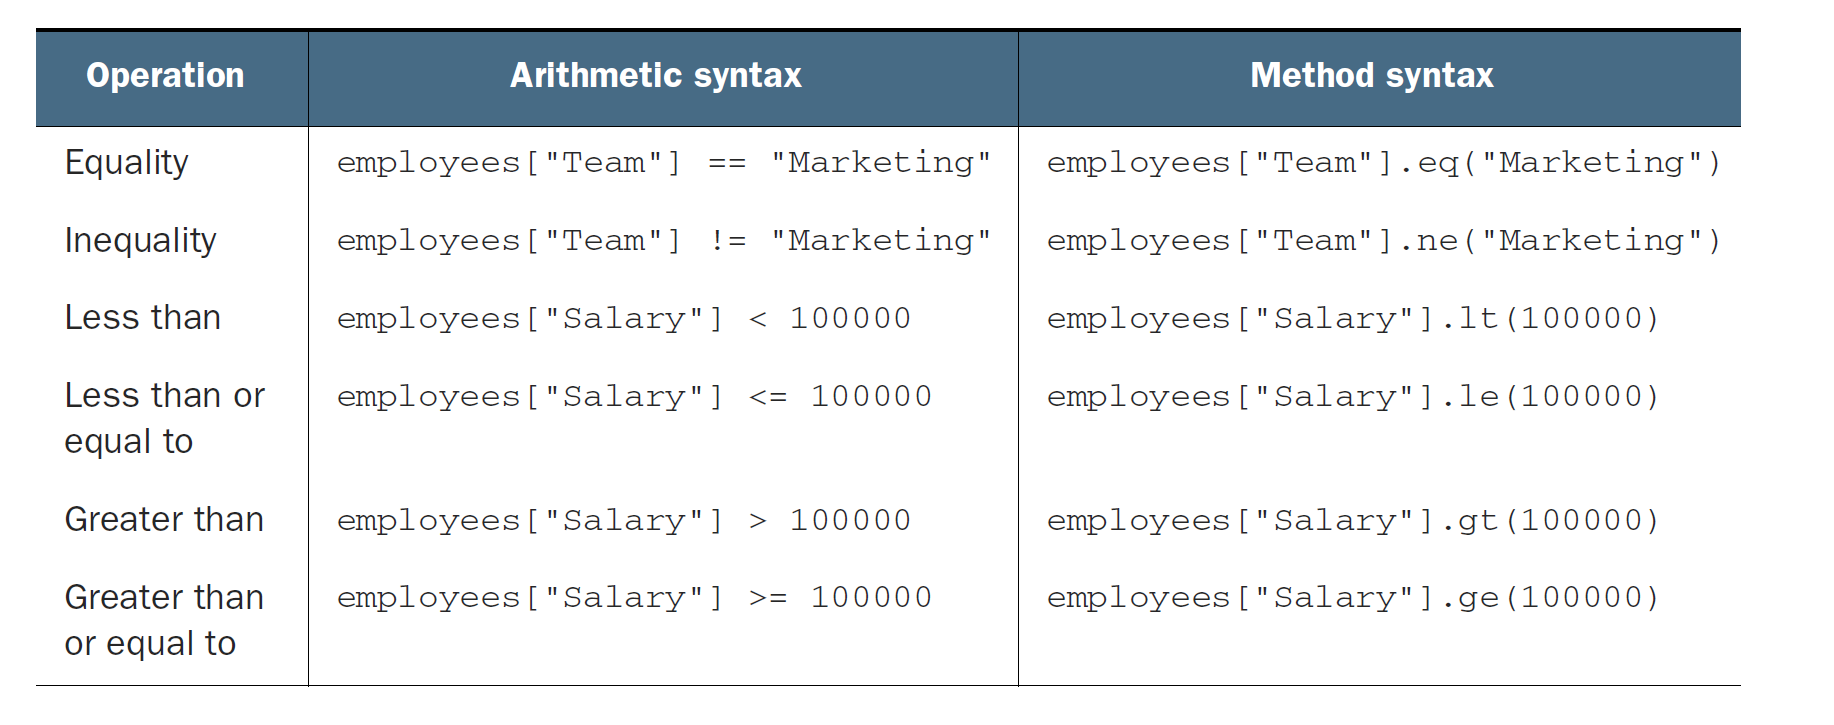

## 5.4 Filtering by condition

### 5.4.1 The isin method

In [59]:
sales = employees["Team"] == "Sales"
legal = employees["Team"] == "Legal"
mktg = employees["Team"] == "Marketing"
employees[sales | legal | mktg].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
5,Dennis,Male,1987-04-18,115163,False,Legal
11,Julie,Female,1997-10-26,102508,True,Legal
13,Gary,Male,2008-01-27,109831,False,Sales
20,Lois,NaN,1995-04-22,64714,True,Legal


In [61]:
all_star_teams = ["Sales", "Leagl", "Marketing"]
on_all_start_teams = employees["Team"].isin(all_star_teams)
employees[on_all_start_teams].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
13,Gary,Male,2008-01-27,109831,False,Sales
21,Matthew,Male,1995-09-05,100612,False,Marketing
26,Craig,Male,2000-02-27,37598,True,Marketing
35,Theresa,Female,2006-10-10,85182,False,Sales


### 5.4.2 The between method

In [64]:
higher_than_80 = employees["Salary"] >= 80000
lower_than_90 = employees["Salary"] < 90000
employees[higher_than_80 & lower_than_90].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
19,Donna,Female,2010-07-22,81014,False,Product
31,Joyce,NaN,2005-02-20,88657,False,Product
35,Theresa,Female,2006-10-10,85182,False,Sales
45,Roger,Male,1980-04-17,88010,True,Sales
54,Sara,Female,2007-08-15,83677,False,Engineering


In [65]:
between_80k_and_90k = employees["Salary"].between(80000, 90000)
employees[between_80k_and_90k].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
19,Donna,Female,2010-07-22,81014,False,Product
31,Joyce,NaN,2005-02-20,88657,False,Product
35,Theresa,Female,2006-10-10,85182,False,Sales
45,Roger,Male,1980-04-17,88010,True,Sales
54,Sara,Female,2007-08-15,83677,False,Engineering


In [66]:
eighties_folk = employees["Start Date"].between(
    left="1980-01-01",
    right="1990-01-01"
)

employees[eighties_folk].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
10,Louise,Female,1980-08-12,63241,True,NaN
12,Brandon,Male,1980-12-01,112807,True,HR
17,Shawn,Male,1986-12-07,111737,False,Product


In [67]:
name_starts_with_r = employees["First Name"].between("R", "S")
employees[name_starts_with_r].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
6,Ruby,Female,1987-08-17,65476,True,Product
36,Rachel,Female,2009-02-16,142032,False,Business Dev
45,Roger,Male,1980-04-17,88010,True,Sales
67,Rachel,Female,1999-08-16,51178,True,Finance
78,Robin,Female,1983-06-04,114797,True,Sales


### 5.4.3 The isnull and notnull methods

In [68]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT


In [69]:
employees["Team"].isnull().head()

0    False
1     True
2    False
3    False
4    False
Name: Team, dtype: bool

In [70]:
employees["Start Date"].isnull().head()

0    False
1    False
2     True
3    False
4    False
Name: Start Date, dtype: bool

In [72]:
employees["Team"].notnull().head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

In [74]:
(~employees["Team"].isnull()).head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

In [77]:
no_team = employees["Team"].isnull()
employees[no_team].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933,True,NaN
10,Louise,Female,1980-08-12,63241,True,NaN
23,NaN,Male,2012-06-14,125792,True,NaN
32,NaN,Male,1998-08-21,122340,True,NaN
91,James,NaN,2005-01-26,128771,False,NaN


In [79]:
has_name = employees["First Name"].notnull()
employees[has_name].tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483,False,Distribution
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


### 5.4.4 Dealing with null  values

In [80]:
employees = pd.read_csv(
    "data/ch05/employees.csv", parse_dates=["Start Date"]
)

C:\Users\liang\AppData\Local\Temp\ipykernel_25748\2612602983.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employees = pd.read_csv(


In [83]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [84]:
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [85]:
employees.dropna(how="all").tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [86]:
employees.dropna(how="any").tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [87]:
employees.dropna(subset=["Gender"]).tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [88]:
employees.dropna(subset=["Start Date", "Salary"]).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product


In [92]:
employees.dropna(thresh=4).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


## 5.5 Dealing with duplicates

### 5.5.1 The duplicated method

In [93]:
employees["Team"].head()

0    Marketing
1          NaN
2      Finance
3      Finance
4           IT
Name: Team, dtype: object

In [94]:
employees["Team"].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

In [95]:
employees["Team"].duplicated(keep="first").head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

In [96]:
employees["Team"].duplicated(keep="last")

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

In [97]:
(~employees["Team"].duplicated()).head()

0     True
1     True
2     True
3    False
4     True
Name: Team, dtype: bool

In [98]:
first_one_in_team = ~employees["Team"].duplicated()
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


### 5.5.2 The drop_duplicates method

In [99]:
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [100]:
employees.drop_duplicates(subset=["Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


In [101]:
employees.drop_duplicates(subset=["Team"], keep="last")

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [102]:
employees.drop_duplicates(subset=["First Name"], keep=False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


In [103]:
name_is_douglas = employees["First Name"] == "Douglas"
is_male = employees["Gender"] == "Male"
employees[name_is_douglas & is_male]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
217,Douglas,Male,1999-09-03,83341.0,True,IT
322,Douglas,Male,2002-01-08,41428.0,False,Product
835,Douglas,Male,2007-08-04,132175.0,False,Engineering


In [104]:
employees.drop_duplicates(subset=["Gender", "Team"]).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


## 5.6 Coding challenge

### 5.6.1 Problems

In [106]:
pd.read_csv("data/ch05/netflix.csv")

,title,director,date_added,type
0,Alias Grace,NaN,3-Nov-17,TV Show
1,A Patch of Fog,Michael Lennox,15-Apr-17,Movie
2,Lunatics,NaN,19-Apr-19,TV Show
3,Uriyadi 2,Vijay Kumar,2-Aug-19,Movie
4,Shrek the Musical,Jason Moore,29-Dec-13,Movie
...,...,...,...,...
5832,The Pursuit,John Papola,7-Aug-19,Movie
5833,Hurricane Bianca,Matt Kugelman,1-Jan-17,Movie
5834,Amar's Hands,Khaled Youssef,26-Apr-19,Movie
5835,Bill Nye: Science Guy,Jason Sussberg,25-Apr-18,Movie


### 5.6.2 Solutions

In [115]:
# 1. Optimize the data set for limited memory use and maximum utility.
netflix = pd.read_csv("data/ch05/netflix.csv", parse_dates=["date_added"])

C:\Users\liang\AppData\Local\Temp\ipykernel_25748\1284439861.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix = pd.read_csv("data/ch05/netflix.csv", parse_dates=["date_added"])


In [116]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 182.5+ KB


In [117]:
netflix.nunique()

title         5780
director      3024
date_added    1092
type             2
dtype: int64

In [118]:
netflix["type"] = netflix["type"].astype("category")

In [119]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 142.8+ KB


In [121]:
# 2. Find all rows with a title of "Limitless".
netflix[netflix["title"] == "Limitless"]

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


In [122]:
# 3. Find all rows with a director of "Robert Rodriguez" and a type of "Movie".
directed_by_robert_rogriguez = netflix["director"] == "Robert Rodriguez"
is_movie = netflix["type"] == "Movie"
netflix[directed_by_robert_rogriguez & is_movie]

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


In [123]:
# 4. Find all rows with either a date_added of "2019-07-31" or a director of
# "Robert Altman".
added_on_july_31 = netflix["date_added"] == "2019-07-31"
directed_by_robert_altman = netflix["director"] == "Robert Altman"
netflix[added_on_july_31 | directed_by_robert_altman]

,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


In [125]:
# 5. Find all rows with a director of "Orson Welles", "Aditya Kripalani", or
# "Sam Raimi".
directors = ["Orson Welles", "Aditya Kripalani", "Sam Raimi"]
target_directors = netflix["director"].isin(directors)
netflix[target_directors]

,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,2018-08-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,2019-06-25,Movie


In [127]:
# 6. Find all rows with a date_added value between May 1, 2019 and June 1, 2019.
may_movies = netflix["date_added"].between("2019-05-01", "2019-06-01")
netflix[may_movies].head()

,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie


In [129]:
# 7. Drop all rows with a NaN value in the director column.
netflix.dropna(subset=["director"]).head()

,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie


In [114]:
# 8. Identify the days when Netflix added only one movie to its catalog.
netflix.drop_duplicates(subset=["date_added"])